In [152]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa

In [137]:
sample_audio_src = "meld/train/happy/MEL_dia950_utt6_positive_HAP.wav"
y, sr = librosa.load(sample_audio_src, res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
y.shape

(160407,)

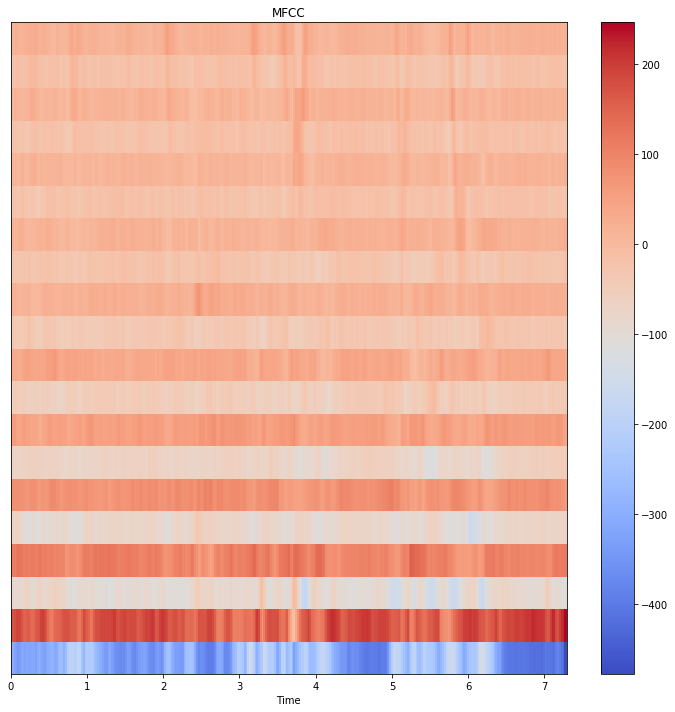

In [125]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [191]:
src = "meld/train"
X_train = []
y_train = []
label_to_int = {
    'disgust': 0,
    'fear': 1,
    'happy': 2,
    'neutral': 3,
    'sad': 4,
}

AUDIO_LENGTH = 80000

for root, dirs, files in os.walk(src):
    for file in files:
        if not file.endswith('.wav'):
            continue
            
        y, sr = librosa.load(os.path.join(root, file), res_type='kaiser_fast')
        
        if len(y) < AUDIO_LENGTH:
            y = np.concatenate((y, np.zeros(shape = (AUDIO_LENGTH - len(y)))))
        y = y[:AUDIO_LENGTH]
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        X_train.append(mfcc)
        y_train.append(label_to_int[root[11:]])
        
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
y_train = np.array(y_train)

src = "meld/val"
X_val = []
y_val = []

for root, dirs, files in os.walk(src):
    for file in files:
        if not file.endswith('.wav'):
            continue
            
        y, sr = librosa.load(os.path.join(root, file), res_type='kaiser_fast')
        
        if len(y) < AUDIO_LENGTH:
            y = np.concatenate((y, np.zeros(shape = (AUDIO_LENGTH - len(y)))))
        y = y[:AUDIO_LENGTH]
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

        X_val.append(mfcc)
        y_val.append(label_to_int[root[9:]])
        
X_val = np.array(X_val)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
y_val = np.array(y_val)

In [205]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(7354, 20, 157, 1) (7354,) (830, 20, 157, 1) (830,)


In [193]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 157, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, 3, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, 3, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    return model

In [203]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 18, 155, 32)       320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 77, 32)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 75, 64)         18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 37, 64)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 35, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2240)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [204]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Train on 7354 samples, validate on 830 samples
Epoch 1/10
7354/7354 [==============================] - 15s 2ms/sample - loss: 1.4064 - accuracy: 0.6129 - val_loss: 1.0796 - val_accuracy: 0.6229
Epoch 2/10
7354/7354 [==============================] - 14s 2ms/sample - loss: 1.0699 - accuracy: 0.6244 - val_loss: 1.0753 - val_accuracy: 0.6229
Epoch 3/10
7354/7354 [==============================] - 14s 2ms/sample - loss: 1.0675 - accuracy: 0.6237 - val_loss: 1.0743 - val_accuracy: 0.6229
Epoch 4/10
7354/7354 [==============================] - 15s 2ms/sample - loss: 1.0590 - accuracy: 0.6243 - val_loss: 1.0741 - val_accuracy: 0.6229
Epoch 5/10
7354/7354 [==============================] - 16s 2ms/sample - loss: 1.0516 - accuracy: 0.6247 - val_loss: 1.0789 - val_accuracy: 0.6229
Epoch 6/10
7354/7354 [==============================] - 16s 2ms/sample - loss: 1.0559 - accuracy: 0.6243 - val_loss: 1.0716 - val_accuracy: 0.6229
Epoch 7/10
7354/7354 [==============================] - 15s 2ms/sample 